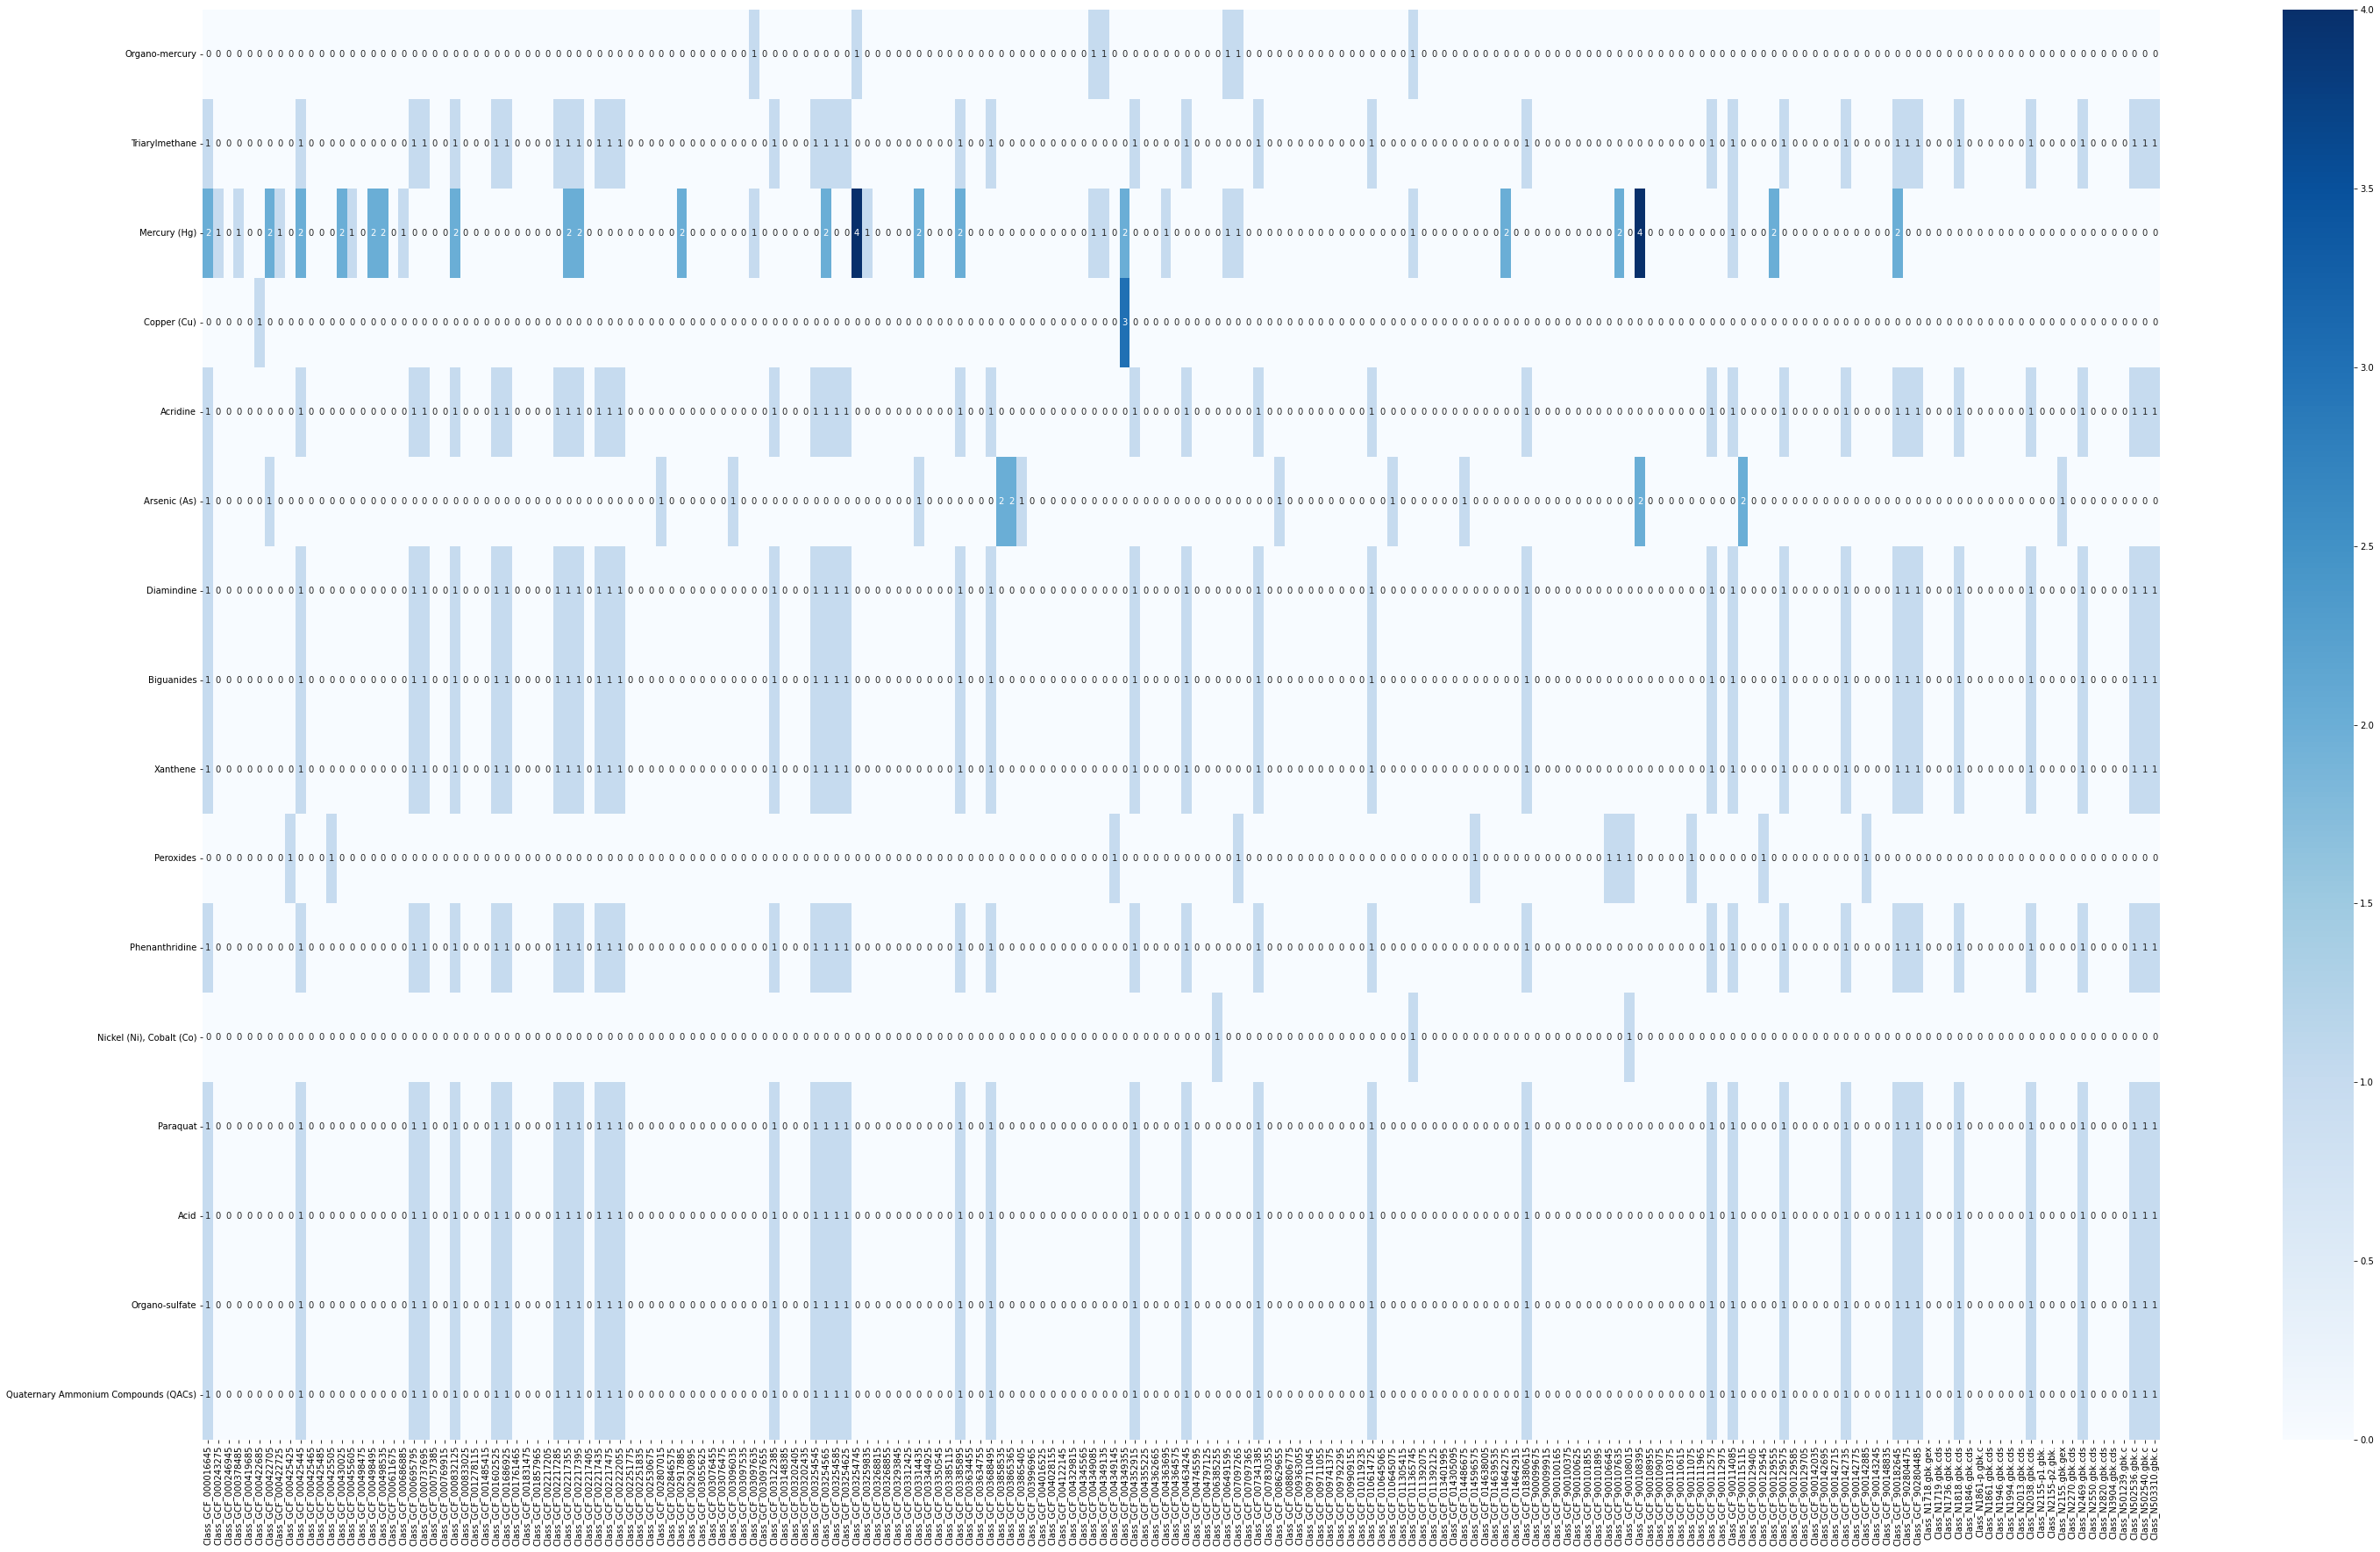

In [1]:
### txt파일이 raw data임을 상정하고 만들었습니다.
### plt와 sns가 아닌 pyecharts를 주로 사용하여 사용하는 파이썬의 경로 파일 안에 chromedriver.exe가 필요합니다.
### https://chromedriver.chromium.org/downloads 에서 사용하고있는 chrome 웹 브라우저의 버전과 동일한 프로그램을 다운받으시면 됩니다.
### raw data의 병합, 데이터프레임화, 시각화까지 한 번에 연결하였기 때문에 만약 이미 merge되어있는 데이터프레임 혹은 csv가 있다면 
### merge data DataFraming의 부분만 따로 때내어 실행하시면 됩니다. 실행 전에는 merge되어있는 csv의 경로를 설정해주십시오.
### 시각화는 위에서 설명한 chromedriver가 없으면 heatmap외에는 실행되지 않습니다. 가능하다면 꼭 해주세요.
### 시각화는 bar_stack, polar, heatmap 2종류(plt&sns, pyecharts)로 구성되어 있습니다. bar3D도 조만간 추가하겠습니다.
### heatmap 2종은 y_axis가 반대로 되어있습니다. 결과는 동일하지만 혼란이 생길까봐 남깁니다.
### 일반적인 bar는 추가하지 않았습니다. 교수님께서 이미 샘플을 가지고 계시기도 하고, 제가 보기에는 별로 중요해 보이지 않았습니다.
#####################################################################################################################################################################################
                                        # raw data merge processing
import os; import glob; import shutil
import pandas as pd; import numpy as np; import math; import seaborn as sns         
path='C:/ANS/rawdata'      ###### 경로설정!! raw data가 있는 파일 경로. 개인 설정이라 사용자에 따라 바꿔야합니다.
file_list=os.listdir(path)
find='reID'                                                                         # 파일 이름의 시작이 reID인것만 추출. 다른 이름 찾는 경우를 위해 변수로 설정

file_list_reID_txt=[file for file in file_list if file.startswith(find)]            # 단점으로는 파일 이름의 통일성이 없으면 추출이 안됨. 다른 방법 강구해야할 필요 있음

os.mkdir(os.getcwd()+'\\excels')
for i in range(len(file_list_reID_txt)):                                            # txt파일로 병합시 오류가 생각보다 많아서 엑셀로 변환
    fixed_csv=pd.read_csv(path + '/' + file_list_reID_txt[i],sep='\t')
    fix_to_excel=fixed_csv.to_excel(os.getcwd()+'\\excels\\'+'{}'.format(file_list_reID_txt[i])+'.xlsx',index=False)

new_excel_path=os.getcwd()+'\\excels'                                               # 변환된 엑셀 파일들 경로
new_file_list=os.listdir(new_excel_path)                                            
new_file_list_reID_xlsx=[file for file in new_file_list if file.startswith(find)]

df_columns_name=[]                                                                  # 그냥 출력시 count가 count,count_2로 나와서 일괄적으로 count로 뽑기위함
all_data = pd.DataFrame()                                                           # 저장된 엑셀 병합
for f in glob.glob(new_excel_path+'\\'+find+'_*.xlsx'): 
    df = pd.DataFrame(pd.read_excel(f))  
    df_columns_name.append(list(df.columns))
    all_data = pd.merge(all_data, df ,how='outer', left_index=True, right_index=True,suffixes=('','_2'))
df_columns_name=list(np.array(df_columns_name).flatten())
all_data.to_excel(os.getcwd()+'\\merged.xlsx', header=df_columns_name, index=False) # 병합된 엑셀 한 단계 상위폴더에 저장(os.getcwd)
shutil.rmtree(os.getcwd()+'\\excels')                                               # 단일 객체 엑셀들이 모인 폴더는 삭제


                                        # merged data DataFraming
import pandas as pd; import numpy as np; import math; import seaborn as sns
excel_file=pd.read_excel(os.getcwd()+'\\merged.xlsx')   ###### 경로설정!! 이미 merge된 csv가 있다면 그 csv의 경로를 넣으면 됩니다.
excel_file=pd.DataFrame(excel_file)                                                                             # 경로 설정 후 파일 불러온 후 데이터프레임화
excel_value=np.array(excel_file.values); flatten_excel_value=list(set(list(excel_value.flatten())))             # value만 추출 value 1차원화, nan 제외 중복값 삭제
only_str=[x for x in flatten_excel_value if type(x) !=float]; only_str=[x for x in only_str if type(x) !=int]   # 제거 성분(row)를 위해 int,float값 삭제
only_str=[str(x) for x in only_str]                                                                             # 혹시몰라 한 번더 문자화
row=[x for x in only_str if x !='nan']                                                                          # row정의 nan값 삭제, 제거 성분만 남김
col=excel_file.columns[excel_file.columns.str.contains('Class')]                                                # col정의 'Class'가 들어간 열만 뽑아 객체만 남김
col_flatten=np.array(col).flatten()
for k in range(len(col)):                                                                                       # col 벡터화 후 열 객체 name 길이 줄이기
    col_flatten[k]=col_flatten[k][0:19]
col_fixed=list(col_flatten)
n=len(row); m=len(col)                                                                                          # 새롭게 만들 행렬의 행x열 크기를 위한 n,m설정
count_data=excel_file[excel_file.columns[excel_file.columns.str.contains('Count')]]                             # 'Count'가 들어간 열만 뽑아 카운트 데이터 생성 
count_data=count_data.rename(columns={'Count':'Count.0'})                                                       # 첫 Column name이 Count여서 편의성과 통일성을 위해 교정
# 'Class'와 'Count'는 추후에 함수화시 변수로 만들어 사용할 예정 혹은 수정해서 사용
count_data=count_data.fillna(0)                                                                                 # nan값 0으로 교체
removal_ingredient=excel_file[col]                                                                              # 각 Class의 제거되는 요소 
commit_first_value=np.zeros((n,m))                                                                              # 최종 데이터프레임의 value값. 최종 형태도 카운트 데이터이기에 np.zeros사용
commit=pd.DataFrame(commit_first_value,row,col_fixed)                                                           # 데이터 프레임화                                                                   
for i in range(len(col)):                                                                                       # Class 범위
    removal_ingredient_list=list(removal_ingredient.values[:,i])                                                # 각 Class의 제거되는 요소 추출
    for j in range(len(removal_ingredient_list)):                                                               # 추출된 요소 범위
        if removal_ingredient_list[j] in row:                                                                   # 추출된 요소가 row에 포함되어 있는지 여부 판별
            commit[commit.columns[i]][removal_ingredient_list[j]]=count_data['Count.{}'.format(i)][j]           # 포함되어 있을때 위치에 알맞는 카운트 데이터가 새 행렬 commit에 들어감
        else: pass
commit

                                        # DataFrame visualization
import pyecharts; import matplotlib.pyplot as plt
from pyecharts import options as opts
from pyecharts.render import make_snapshot
import snapshot_selenium.snapshot as driver
from pyecharts.globals import ThemeType

# 테마목록  VINTAGE MACARONS INFOGRAPHIC SHINE ROMA WESTEROS WONDERLAND CHALK HALLOWEEN ESSOS WALDEN PURPLE-PASSION ROMANTIC LIGHT
# 아마 더 많을텐데 공홈에서도 이것만 나와있음

                                            ## bar chart stack
from pyecharts.charts import Bar
bar_stack = Bar(init_opts=opts.InitOpts(theme=ThemeType.WALDEN,width="{}px".format(n*100), height="{}px".format(m*20))).add_xaxis(list(commit.columns))
for i in range(len(commit.index)):       
    bar_stack.add_yaxis('{}'.format(commit.index[i]),list(commit.values[i]),stack='stack1',label_opts=opts.LabelOpts(is_show=False))
bar_stack.set_global_opts(title_opts=opts.TitleOpts(title="Bar-stacked",subtitle='count data'),
                    legend_opts=opts.LegendOpts(pos_left='10%'),
                    datazoom_opts=[opts.DataZoomOpts(),opts.DataZoomOpts(orient="vertical"), opts.DataZoomOpts(type_="inside")],
                    toolbox_opts=opts.ToolboxOpts(orient="vertical",pos_left='90%',pos_top='5%'),
                    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-90)))
bar_stack.reversal_axis()

                                            ## heatmap_plt,sns
plt.figure(figsize=(50,30))
ax=sns.heatmap(commit,cmap=plt.cm.Blues,annot=True)

                                            ## polar
from pyecharts.charts import Polar
polar_angle = Polar(init_opts=opts.InitOpts(theme=ThemeType.WALDEN,width="{}px".format(n*100), height="{}px".format(m*5)))
polar_angle.add_schema(angleaxis_opts=opts.AngleAxisOpts(data=list(commit.columns), type_="category"))
for i in range(len(row)):
    polar_angle.add("{}".format(commit.index[i]), list(commit.values[i]), type_="bar", stack="stack0")
polar_angle.set_global_opts(title_opts=opts.TitleOpts(title="Polar-AngleAxis", subtitle='count data'),
                            legend_opts=opts.LegendOpts(pos_left='10%'),
                            datazoom_opts=[opts.DataZoomOpts(),opts.DataZoomOpts(orient="vertical"),opts.DataZoomOpts(type_="inside")],
                            toolbox_opts=opts.ToolboxOpts(orient="vertical",pos_left='90%',pos_top='10%'),
                            xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-90)))

                                            ## data_transform
np.shape(commit.values)
commit_vectorization=[]
for i in range(n):
    for j in range(m):
        commit_vectorization.append([i,j,int(commit.values[i,j])])
commit_vectorization
commit_data=[[d[1],d[0],d[2]or'-']for d in commit_vectorization]
commit_data
commit_data_max= [d[2] for d in commit_vectorization]
commit_data_max=np.max(commit_data_max)
commit_data_max

                                            ## heatmap_pyecharts
from pyecharts.charts import HeatMap
heatmap = HeatMap(init_opts=opts.InitOpts(theme=ThemeType.WALDEN,width="{}px".format(n*100), height="{}px".format(m*5)))
heatmap.add_xaxis(list(commit.columns))
heatmap.add_yaxis("count data", list(commit.index), commit_data, label_opts=opts.LabelOpts(is_show=True, position="inside"))
heatmap.set_global_opts(title_opts=opts.TitleOpts(title="HeatMap",subtitle='count data'), legend_opts=opts.LegendOpts(pos_left='10%')
                        ,visualmap_opts=opts.VisualMapOpts(max_=int(commit_data_max)+1,orient='horizontal',range_color=['#FFFFE0','#FFA07A','#CD5C5C','#8B0000'])
                        ,toolbox_opts=opts.ToolboxOpts(), xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-90))
                        ,datazoom_opts=[opts.DataZoomOpts(),opts.DataZoomOpts(orient="vertical"), opts.DataZoomOpts(type_="inside")])

                                            ## page
from pyecharts.charts import Page
page=Page()
page.add(bar_stack, polar_angle, heatmap)
page.render_notebook()

In [102]:
## 3D Bar - 보류 잘 작동안함 무슨원리로 돌아가는거지
commit_3D=[]
for i in range(m):#190
    for j in range(n):#16
        commit_3D.append([int(commit.values[j,i])])
commit_3D_data=commit_3D
commit_3D_data=np.array(commit_3D_data).reshape(n,m)
from pyecharts.charts import Bar3D
bar3d = Bar3D(init_opts=opts.InitOpts(theme=ThemeType.WALDEN,width="{}px".format(n*100), height="{}px".format(m*5)))
bar3d.add(
        "",
        commit_3D_data,
        xaxis3d_opts=opts.Axis3DOpts(data=list(commit.columns), type_="category"),
        yaxis3d_opts=opts.Axis3DOpts(data=list(commit.index), type_="category"),
        zaxis3d_opts=opts.Axis3DOpts(type_="value"))
bar3d.set_global_opts(title_opts=opts.TitleOpts("Bar3D"),visualmap_opts=opts.VisualMapOpts(max_=int(commit_data_max)+1,range_color=['#FFFFE0','#FFA07A','#CD5C5C','#8B0000'])
                      ,toolbox_opts=opts.ToolboxOpts())
bar3d.render("Bar3d.html")
commit_3D

[[1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [2],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [2],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [2],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0]